In [2]:
import os

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [5]:
path = '../../../All_data_sets/eda_dataset/StudentsPerformance.csv'

df =pd.read_csv(path)

In [6]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [7]:
# change the column name

df.rename( columns={'race/ethnicity':'ethnicity'} , inplace=True )

In [8]:
df.shape

(1000, 8)

In [9]:
df.isnull().sum()

gender                         0
ethnicity                      0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

### Thre are no null values

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   ethnicity                    1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [11]:
cat_cols = [feature for feature in df.columns if df[feature].dtype == 'O' ]

num_cols = [feature for feature in df.columns if df[feature].dtype != 'O' ]

In [12]:
cat_cols

['gender',
 'ethnicity',
 'parental level of education',
 'lunch',
 'test preparation course']

In [13]:
num_cols

['math score', 'reading score', 'writing score']

In [14]:
for feature in cat_cols:
    print( feature,":",end="" )
    print( df[feature].unique() )
    print()

gender :['female' 'male']

ethnicity :['group B' 'group C' 'group A' 'group D' 'group E']

parental level of education :["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']

lunch :['standard' 'free/reduced']

test preparation course :['none' 'completed']



In [15]:
df[ df.duplicated() ]

,gender,ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score


### no duplicates

In [16]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


## combine all the numercial columns to get the total score column

In [17]:
df[ 'total_score' ] = df[ num_cols[0] ] + df[ num_cols[1] ] + df[ num_cols[2] ]

df.head()

,gender,ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229


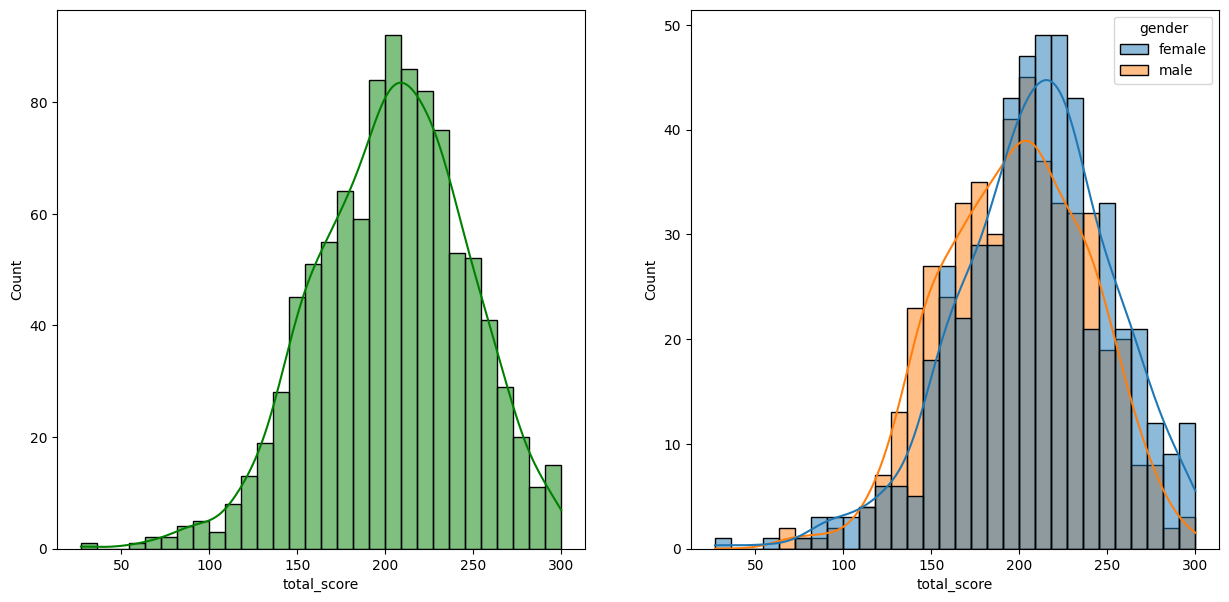

In [18]:
fig , axs = plt.subplots( 1,2 , figsize=(15,7) )

plt.subplot(121)
sns.histplot( data=df,x ='total_score',bins=30,kde=True , color='g' )


plt.subplot(122)
sns.histplot( data=df,x ='total_score',bins=30,kde=True , hue='gender' )

plt.show()